# Data exploration and initial cleaning

In [1]:
import numpy as np
import pandas as pd

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes 
#import folium 

%pylab inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set(style="whitegrid"); # set optional settings for seaborn

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime as dt

In [3]:
def col_info(col):
    print('data type:',col.dtype)
    print('number of rows:',col.count())
    print('number of nans:',col.isna().sum())
    print('unique entries:',len(col.unique()))
    print(col.value_counts().sort_values(ascending = False).head(10))

**a. Age/gender composition of destination countries

In [4]:
df = pd.read_pickle('data/age_gender_bkts.pkl')

In [5]:
df.head()

,age_bucket,country_destination,gender,population,year,pop_total,pct_of_total_pop,age_bkt_min
0,100+,AU,male,1,2015,23923,0.000042,100
1,95-99,AU,male,9,2015,23923,0.000376,95
2,90-94,AU,male,47,2015,23923,0.001965,90
3,85-89,AU,male,118,2015,23923,0.004932,85
4,80-84,AU,male,199,2015,23923,0.008318,80


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 8 columns):
age_bucket             420 non-null object
country_destination    420 non-null object
gender                 420 non-null object
population             420 non-null int64
year                   420 non-null int64
pop_total              420 non-null int64
pct_of_total_pop       420 non-null float64
age_bkt_min            420 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 29.5+ KB


In [7]:
df.describe()

,population,year,pop_total,pct_of_total_pop,age_bkt_min
count,420.000000,420.0,420.000000,420.000000,420.000000
mean,1743.133333,2015.0,73211.600000,0.023810,50.000000
std,2509.843202,0.0,86964.705655,0.012074,30.312611
min,0.000000,2015.0,10609.000000,0.000000,0.000000
25%,396.500000,2015.0,23923.000000,0.016005,25.000000
50%,1090.500000,2015.0,54174.000000,0.027997,50.000000
75%,1968.000000,2015.0,64983.000000,0.032652,75.000000
max,11601.000000,2015.0,325132.000000,0.044849,100.000000


In [8]:
df.dtypes

age_bucket              object
country_destination     object
gender                  object
population               int64
year                     int64
pop_total                int64
pct_of_total_pop       float64
age_bkt_min              int64
dtype: object

In [9]:
df.age_bucket = [str(x) for x in df.age_bucket]
df.year = [int(x) for x in df.year]
df.population = [int(x) for x in df.population]

In [10]:
df.columns

Index(['age_bucket', 'country_destination', 'gender', 'population', 'year',
       'pop_total', 'pct_of_total_pop', 'age_bkt_min'],
      dtype='object')

In [11]:
df.year.value_counts()

2015    420
Name: year, dtype: int64

i. Percent of males/females in each country in each age bucket

In [12]:
countries = list(df.country_destination.unique())
countries

['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US']

In [13]:
country_pop = df.groupby(['country_destination'])['population'].sum().reset_index()
country_pop = country_pop.rename(columns = {'population': 'pop_total'})
country_pop

,country_destination,pop_total
0,AU,23923
1,CA,35871
2,DE,82562
3,ES,47203
4,FR,64983
5,GB,63840
6,IT,61145
7,NL,16848
8,PT,10609
9,US,325132


In [14]:
#df = pd.merge(df, country_pop, how = 'left', on = 'country_destination')
    

In [15]:
df.head(1)

,age_bucket,country_destination,gender,population,year,pop_total,pct_of_total_pop,age_bkt_min
0,100+,AU,male,1,2015,23923,0.000042,100


In [16]:
df['pct_of_total_pop'] = df['population']/df['pop_total']

In [17]:
df['age_bkt_min'] = [x.split('-', 1)[0] for x in df['age_bucket']]
df['age_bkt_min'] = [int(x.split('+', 1)[0]) for x in df['age_bkt_min']]


In [18]:
df.head()

,age_bucket,country_destination,gender,population,year,pop_total,pct_of_total_pop,age_bkt_min
0,100+,AU,male,1,2015,23923,0.000042,100
1,95-99,AU,male,9,2015,23923,0.000376,95
2,90-94,AU,male,47,2015,23923,0.001965,90
3,85-89,AU,male,118,2015,23923,0.004932,85
4,80-84,AU,male,199,2015,23923,0.008318,80


In [19]:
df.age_bkt_min.value_counts()

100    20
45     20
5      20
10     20
15     20
20     20
25     20
30     20
35     20
40     20
50     20
95     20
55     20
60     20
65     20
70     20
75     20
80     20
85     20
90     20
0      20
Name: age_bkt_min, dtype: int64

In [20]:
age_dist_by_c = df.sort_values('age_bkt_min').groupby(['country_destination','age_bkt_min','age_bucket'])['pct_of_total_pop'].sum().reset_index()
age_dist_by_c.head()


,country_destination,age_bkt_min,age_bucket,pct_of_total_pop
0,AU,0,0-4,0.067090
1,AU,5,5-9,0.063913
2,AU,10,10-14,0.060611
3,AU,15,15-19,0.062910
4,AU,20,20-24,0.067174


In [21]:
test = df[df['country_destination'] == 'AU']
test['age_bucket'].loc[test['pct_of_total_pop'].idxmax()]

'25-29'

In [22]:
max_age_bkt_by_country = []
df_mf = pd.DataFrame(df.groupby(['country_destination','age_bucket','age_bkt_min'])['pct_of_total_pop','population'].sum().reset_index())
countries = list(df_mf.country_destination.unique())


In [23]:
max_age_bkt_by_country = []
#df_mf = pd.DataFrame(df.groupby(['country_destination','age_bucket','age_bkt_min'])['pct_of_total_pop'].sum())
for c in countries:
    temp = df_mf[df_mf['country_destination'] == c] 
    max_age_bkt_by_country.append((c, temp['age_bucket'].loc[temp['population'].idxmax()], temp['age_bkt_min'].loc[temp['population'].idxmax()] ))
country_age_bkt = pd.DataFrame(max_age_bkt_by_country, columns = ['country','age_bucket','age_bkt_min']).sort_values(by='age_bkt_min')
country_age_bkt


,country,age_bucket,age_bkt_min
9,US,20-24,20
0,AU,25-29,25
3,ES,35-39,35
4,FR,40-44,40
8,PT,40-44,40
5,GB,45-49,45
6,IT,45-49,45
7,NL,45-49,45
1,CA,50-54,50
2,DE,50-54,50


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


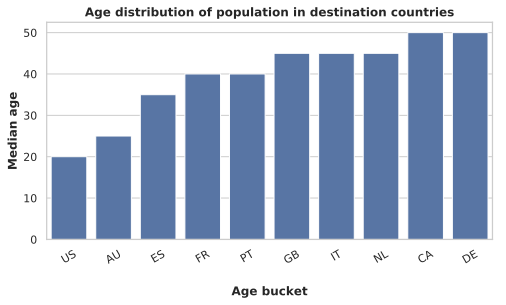

In [24]:
sns.set(style="whitegrid", font='Verdana', font_scale = 1)
fig, ax = plt.subplots(figsize=(8,4), facecolor='white')

Y = country_age_bkt['age_bkt_min']
X = country_age_bkt['country']

#clrs = ['darkgrey' if (x < 8000) else 'cornflowerblue' for x in values]

sns.barplot(X, Y, ci=None, color='b').set_title('Age distribution of population in destination countries', fontsize=12, weight = 'bold')
ax.set_xlabel("Age bucket", fontsize = 12, labelpad = 20, weight = 'bold')

ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

ax.set_ylabel("Median age", fontsize = 12, weight = 'bold'); 

fig = ax.get_figure()
#fig.savefig("G3.png", bbox_inches='tight')



In [25]:
df.to_pickle('data/age_gender_bkts.pkl')

**b. Destination countries dataset**

In [26]:
df = pd.read_pickle('data/countries.pkl')

In [27]:
df.head()

,country_desntination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_desntination             10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [29]:
df.describe()

,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


In [30]:
df.dtypes

country_desntination              object
lat_destination                  float64
lng_destination                  float64
distance_km                      float64
destination_km2                  float64
destination_language              object
language_levenshtein_distance    float64
dtype: object

**c. User sessions dataset**

In [31]:
df = pd.read_pickle('data/sessions.pkl')

In [32]:
df.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,2pw9yjm8aq,new,view,list_your_space,Windows Desktop,9412.0
1,6i6kadln0b,index,-unknown-,-unknown-,Android App Unknown Phone/Tablet,4851.0
2,6i6kadln0b,collections,-unknown-,-unknown-,Android App Unknown Phone/Tablet,26.0
3,6i6kadln0b,show,-unknown-,-unknown-,Android App Unknown Phone/Tablet,3353.0
4,6i6kadln0b,show,-unknown-,-unknown-,Android App Unknown Phone/Tablet,357.0


In [33]:
col_info(df.user_id)

data type: object
number of rows: 10533241
number of nans: 34496
unique entries: 135484
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
ht8alhs4lt    2335
wyv1imf8qw    2323
monrpvx2md    2264
9z4gim1s4l    2264
h0cjxc177k    2246
Name: user_id, dtype: int64


In [34]:
col_info(df.action)

data type: object
number of rows: 10488111
number of nans: 79626
unique entries: 360
show                     2768278
index                     843699
search_results            725226
personalize               706824
search                    536057
ajax_refresh_subtotal     487744
update                    365130
similar_listings          364624
social_connections        339000
reviews                   320591
Name: action, dtype: int64


In [35]:
col_info(df.device_type)

data type: object
number of rows: 10567737
number of nans: 0
unique entries: 14
Mac Desktop                         3594286
Windows Desktop                     2658539
iPhone                              2105031
Android Phone                        839637
iPad Tablet                          683414
Android App Unknown Phone/Tablet     273652
-unknown-                            211279
Tablet                               139886
Linux Desktop                         28373
Chromebook                            22348
Name: device_type, dtype: int64


In [36]:
df.describe()

,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


In [37]:
df.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

**d. Training set**

signup_flow: the page a user came to signup up from  
language: international language preference  
affiliate_channel: what kind of paid marketing  
affiliate_provider: where the marketing is e.g. google, craigslist, other  
first_affiliate_tracked: whats the first marketing the user interacted with before the signing up  

In [38]:
df_train = pd.read_pickle('data/train_users_2.pkl')

In [39]:
df_test = pd.read_pickle('data/test_users.pkl')

In [40]:
#df_test['data_set'] = 'test'
#df_train['data_set'] = 'train'

In [41]:
#frames = [df_test, df_train]
#df_users = pd.concat(frames, sort = False)

In [42]:
#df_users = pd.read_pickle('data/train_test.pkl')

***

In [43]:
df_users = df_train

In [44]:
df_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,None,-unknown-,None,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,None,MALE,38.0,facebook,0.0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [45]:
for c in df_users.columns:
    print('')
    print('*****')
    print('')
    print('col name =',c)
    col_info(df_users[c])


*****

col name = id
data type: object
number of rows: 213451
number of nans: 0
unique entries: 213451
p2j15lz8ge    1
xmms1awq8p    1
yva1tciq1z    1
r6j563iqz9    1
00w6y912j5    1
16jwt50he4    1
50grlvnbze    1
v1wkwxk8z5    1
ndsqs6u4rc    1
lxr94q3k00    1
Name: id, dtype: int64

*****

col name = date_account_created
data type: object
number of rows: 213451
number of nans: 0
unique entries: 1634
2014-05-13    674
2014-06-24    670
2014-06-25    636
2014-05-20    632
2014-05-14    622
2014-05-21    602
2014-06-03    602
2014-06-16    598
2014-06-11    593
2014-06-30    590
Name: date_account_created, dtype: int64

*****

col name = timestamp_first_active
data type: object
number of rows: 213451
number of nans: 0
unique entries: 213451
20140114085954    1
20140409202226    1
20131005085528    1
20140402070447    1
20110925202419    1
20140425015151    1
20130726174708    1
20140624001352    1
20140501063751    1
20130606202036    1
Name: timestamp_first_active, dtype: int64

****

In [46]:
col_info(df_test.date_first_booking)

data type: object
number of rows: 0
number of nans: 62096
unique entries: 1
Series([], Name: date_first_booking, dtype: int64)


In [47]:
col_info(df_train.country_destination)

data type: object
number of rows: 213451
number of nans: 0
unique entries: 12
NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
Name: country_destination, dtype: int64


In [48]:
df_users[(df_users.country_destination != 'NDF') & (df_users.country_destination.isna() == False)]

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3.0,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0.0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0.0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,None,basic,0.0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0.0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0.0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US
10,yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0.0,en,other,craigslist,untracked,Web,Mac Desktop,Firefox,US
12,k6np330cm1,2010-01-05,20100105060859,2010-01-18,-unknown-,None,basic,0.0,en,direct,direct,None,Web,Other/Unknown,-unknown-,FR


*i. Time passed between time first active and time account created* 

In [49]:
df_users.dtypes

id                          object
date_account_created        object
timestamp_first_active      object
date_first_booking          object
gender                      object
age                         object
signup_method               object
signup_flow                float64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [50]:
df_users['date_account_created'] = pd.to_datetime(df_users['date_account_created'])
df_users['timestamp_first_active'] = pd.to_datetime(df_users['timestamp_first_active'])
df_users['date_first_booking'] = pd.to_datetime(df_users['date_first_booking'])

In [51]:
df_users['account_elapse_time'] = abs(df_users['timestamp_first_active'] - df_users['date_account_created'])

*ii. One-hots for gender, signup_method, language, affiliate_channel, affiliate_provider, first_affiliate_tracked, signup_app, first_device_type, first_browser*

In [52]:
one_hots = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
            'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

In [53]:
for a in one_hots:    
    df_users[a] = df_users[a].str.lower()
    df_users[a] = df_users[a].str.replace('-','')
    df_users[a] = df_users[a].str.replace('/','_')
    col_info(df_users[a])


data type: object
number of rows: 213451
number of nans: 0
unique entries: 4
unknown    95688
female     63041
male       54440
other        282
Name: gender, dtype: int64
data type: object
number of rows: 213451
number of nans: 0
unique entries: 3
basic       152897
facebook     60008
google         546
Name: signup_method, dtype: int64
data type: object
number of rows: 213451
number of nans: 0
unique entries: 25
en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
Name: language, dtype: int64
data type: object
number of rows: 213451
number of nans: 0
unique entries: 8
direct         137727
sembrand        26045
semnonbrand     18844
other            8961
seo              8663
api              8167
content          3948
remarketing      1096
Name: affiliate_channel, dtype: int64
data type: object
number of rows: 213451
number of nans: 0
unique entries: 18
direct               137426
google                5169

In [54]:
#a = one_hots[3]
#a = one_hots[8]
for a in one_hots:
    one_hot = pd.get_dummies(df_users[a])
    one_hot = one_hot.add_prefix(a+'_')
    df_users = df_users.join(one_hot.iloc[:,0:-1])


In [55]:
df_users.shape

(213451, 138)

In [56]:
df_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_browser_seamonkey,first_browser_silk,first_browser_sitekiosk,first_browser_slimbrowser,first_browser_sogou explorer,first_browser_stainless,first_browser_tenfourfox,first_browser_theworld browser,first_browser_unknown,first_browser_wosbrowser
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,unknown,None,facebook,0.0,en,direct,...,0,0,0,0,0,0,0,0,0,0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,male,38.0,facebook,0.0,en,seo,...,0,0,0,0,0,0,0,0,0,0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,female,56.0,basic,3.0,en,direct,...,0,0,0,0,0,0,0,0,0,0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,female,42.0,facebook,0.0,en,direct,...,0,0,0,0,0,0,0,0,0,0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,unknown,41.0,basic,0.0,en,direct,...,0,0,0,0,0,0,0,0,0,0


*iii.Categorical for country_destination*

In [57]:
dests = list(df_users.country_destination.unique())
dests_dict = {}
for i, d in enumerate (dests):
    dests_dict[d] = i
    #if df_users.country_destination == d:
     #   df_users['country_dest_id'] = i
dests_dict

df_users['country_dest_id'] = df_users['country_destination'].map(dests_dict)

In [58]:
dests_dict

{'NDF': 0,
 'US': 1,
 'other': 2,
 'FR': 3,
 'CA': 4,
 'GB': 5,
 'ES': 6,
 'IT': 7,
 'PT': 8,
 'NL': 9,
 'DE': 10,
 'AU': 11}

In [59]:
df_users.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel',
       ...
       'first_browser_silk', 'first_browser_sitekiosk',
       'first_browser_slimbrowser', 'first_browser_sogou explorer',
       'first_browser_stainless', 'first_browser_tenfourfox',
       'first_browser_theworld browser', 'first_browser_unknown',
       'first_browser_wosbrowser', 'country_dest_id'],
      dtype='object', length=139)

*iv. Age to numeric*

In [60]:
df_users['age'] = pd.to_numeric(df_users['age'], errors = 'coerce')

df_users['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [61]:
#df_users.loc[df_users.age > 100, 'age'] = np.nan
#df_users.loc[df_users.age < 16, 'age'] = np.nan
#df_users['age'][df_users['age'].isna() == True] = df_users['age'].median()

In [62]:
df_users.to_pickle('data/users_train.pkl')

**Features from other datasets???**

Proportion of citizens in destination country of the same age/gender

1/0 for speaking same language as destination country

Dummy for device type

Seconds elapsed????